

# Project  3 - Collaboration and competition from the Deep Reinforcement Learning Nanodegree of Udacity

The task is to train two agents to control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1. If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01. Thus, the goal of each agent is to keep the ball in play. The task is continuous, although the episodes end after a certain time or when an agent fails. 

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Each agent receives its own, local observation. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

In order to solve the environment, the agents must get an average score of +0.5 (over 100 consecutive episodes, after taking the maximum over both agents). More explicitly, after each episode, the rewards that each agent received (without discounting) are added up to get a score for each agent. This yields 2 (potentially different) scores; the maximum of these 2 scores is taken as the (single) score for each episode.


## 1. Start the Environment

We begin by importing some necessary packages and starting the Unity environment provided by Udacity. Environments contain *_brains_*, which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain.

In [1]:
from unityagents import UnityEnvironment
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

from ddpg_agent import Agent
import torch

env = UnityEnvironment(file_name="/home/pedro/codes/p3_collab-compet/Tennis_Linux/Tennis.x86_64")

brain_name = env.brain_names[0]
brain = env.brains[brain_name]


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


## 2. Training

Here we train the agent using the action/reward feedback loop characteristic of reinforcement learning. Details on the agent and its underlying model are to be found in the accompanying files, and are discussed in the report.

Episode 100	Score 0.00	Average Score 0.01
Episode 200	Score 0.00	Average Score 0.01
Episode 300	Score 0.00	Average Score 0.03
Episode 400	Score 0.00	Average Score 0.00
Episode 500	Score 0.00	Average Score 0.00
Episode 600	Score 0.00	Average Score 0.00
Episode 700	Score 0.00	Average Score 0.01
Episode 800	Score 0.09	Average Score 0.04
Episode 900	Score 0.10	Average Score 0.09
Episode 1000	Score 0.10	Average Score 0.10
Episode 1100	Score 0.30	Average Score 0.12
Episode 1200	Score 0.10	Average Score 0.17
Episode 1300	Score 2.60	Average Score 1.03
Episode 1400	Score 2.60	Average Score 1.79
Episode 1500	Score 1.80	Average Score 0.82


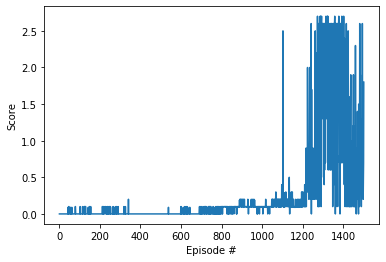

In [2]:
def ddpg(n_episodes=1500):
    scores_deque = deque(maxlen=100)
    scores_all = []                          
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        states = env_info.vector_observations
        agent0.reset()
        agent1.reset()
        scores = np.zeros(num_agents)
        while True:
            action0 = agent0.act(states[0], add_noise=True)    
            action1 = agent0.act(states[1], add_noise=True)    
            env_info = env.step([action0, action1])[brain_name]
            next_states = env_info.vector_observations         
            rewards = env_info.rewards                         
            dones = env_info.local_done                        
            agent0.step(states[0], action0, rewards[0], next_states[0], dones[0])
            agent1.step(states[1], action1, rewards[1], next_states[1], dones[1])
            states = next_states
            scores += rewards
            if np.any(dones):
                break 
        scores_deque.append(np.max(scores))
        scores_all.append(np.max(scores))
        if i_episode % 100 == 0:
            print('\rEpisode {}\tScore {:.2f}\tAverage Score {:.2f}'.format(i_episode, np.max(scores), np.mean(scores_deque)))
            torch.save(agent0.actor_local.state_dict(), 'checkpoint_actor0.pth')
            torch.save(agent0.critic_local.state_dict(), 'checkpoint_critic0.pth')
            torch.save(agent1.actor_local.state_dict(), 'checkpoint_actor1.pth')
            torch.save(agent1.critic_local.state_dict(), 'checkpoint_critic1.pth')
        else:        
            print('\rEpisode {}\tScore {:.2f}\tAverage Score {:.2f}'.format(i_episode, np.max(scores), np.mean(scores_deque)), end="")
    return scores_all

env_info = env.reset(train_mode=True)[brain_name]
num_agents = len(env_info.agents)
action_size = brain.vector_action_space_size
states = env_info.vector_observations
state_size = states.shape[1]
agent0 = Agent(state_size, action_size)
agent1 = Agent(state_size, action_size)
scores = ddpg()

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

### 3. Testing

Next we reset the environment and agents, and load saved waits, in order to watch the agents acting in an episode. This section can be skipped if the reader is already familiar with the setup, or it can be used to evaluate the trained agents.

In [4]:
env_info = env.reset(train_mode=False)[brain_name]
num_agents = len(env_info.agents)
action_size = brain.vector_action_space_size
states = env_info.vector_observations
state_size = states.shape[1]

agent0 = Agent(state_size, action_size)
agent0.actor_local.load_state_dict(torch.load('checkpoint_actor0.pth'))
agent0.critic_local.load_state_dict(torch.load('checkpoint_critic0.pth'))

agent1 = Agent(state_size, action_size)
agent1.actor_local.load_state_dict(torch.load('checkpoint_actor1.pth'))
agent1.critic_local.load_state_dict(torch.load('checkpoint_critic1.pth'))

scores = np.zeros(num_agents)                        
while True:
    action0 = agent0.act(states[0], add_noise=False)    
    action1 = agent1.act(states[1], add_noise=False)    
    env_info = env.step([action0, action1])[brain_name] 
    next_states = env_info.vector_observations         
    rewards = env_info.rewards                         
    dones = env_info.local_done                        
    scores += env_info.rewards                         
    states = next_states                               
    if np.any(dones):                                  
        break
print('Score (max over agents) from episode: {}'.format(np.max(scores)))

Score (max over agents) from episode: 0.5000000074505806


In [5]:
env.close()

That is all in the notebook, more details in the algorithm and its implementation can be found in the accompanying report and source code.